In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('finished_data.csv')

In [3]:
df = df.drop('Unnamed: 0', axis=1)

In [4]:
df.head()

,Hotel name,Hotel price,Reviews count,Location rating,Cleanliness rating,Service rating,Value rating,Pool_numerical,Free_parking_numerical,free_wifi_numerical,...,safe numerical,airport numerical,taxi numerical,pets allowed numerical,private balcony numerical,ocean view numerical,spa numerical,number of restaurants,number of attractions,rating
0,Tsokas Hotel Apartments,1662.51205,114.0,4.5,4.7,4.6,4.7,1,0,0,...,0,0,0,0,0,0,0,20,2,4.5
1,Nano Suites,436.00000,44.0,4.8,5.0,4.8,4.4,1,0,0,...,0,0,0,0,0,0,0,30,8,5.0
2,Santorini Mesotopos,449.00000,306.0,4.3,4.5,4.4,4.2,1,0,0,...,0,0,0,0,0,0,0,23,6,4.5
3,Hotel Off,549.00000,97.0,4.8,5.0,4.8,4.5,1,0,0,...,0,0,0,0,0,0,0,163,96,4.5
4,Lindos Breeze Beach Hotel,1662.51205,138.0,4.2,4.3,4.5,4.5,1,1,1,...,1,1,0,0,1,1,1,120,44,4.5


Dropping the hotel name column because it won't benefit the model.


In [5]:
df = df.drop('Hotel name', axis = 1)

Split the data into features (X) and target (y).

In [6]:
X = df.drop('rating', axis=1)
y = df['rating']

Split the data into training and testing sets.
I decided to split into 80% and 20% because this is the more common division.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

I want to test different models in order to choose the model that brings the best results

## Linear Regression Model:

Now I will examine the model by different metrics.

In [8]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
linear_y_prediction = linear_regression.predict(X_test)

In [9]:
mse_linear = mean_squared_error(y_test, linear_y_prediction)
mae_linear = mean_absolute_error(y_test, linear_y_prediction)
r2_linear = r2_score(y_test, linear_y_prediction)

In [10]:
print('Linear Regression results:')
print('MSE result:', mse_linear)
print('MAE result:', mae_linear)
print('R2 result:', r2_linear)

Linear Regression results:
MSE result: 0.03302924528557546
MAE result: 0.14710895351943035
R2 result: 0.6715627900823058


As we can see, the average score is 67%

Now, let's try another model and see its results.

## Decision Tree Regressor model

Now I will examine the model by different metrics.

In [11]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [12]:
mae_tree = mean_absolute_error(y_test, y_pred_dt)
mse_tree = mean_squared_error(y_test, y_pred_dt)
r2_tree = r2_score(y_test, y_pred_dt)

In [13]:
print('Decision Tree results:')
print('Decision Tree MAE:', mae_tree)
print('Decision Tree MSE:', mse_tree)
print('Decision Tree R2 Score:', r2_tree)

Decision Tree results:
Decision Tree MAE: 0.04780361757105943
Decision Tree MSE: 0.023901808785529714
Decision Tree R2 Score: 0.7623244696743352


### Conclusion:
As can be observed, the Decision Tree Regressor model provides better performance for my data, achieving 73% accuracy rate.

Let's show a scatterplot that compares between the actual values against the predicted ones.

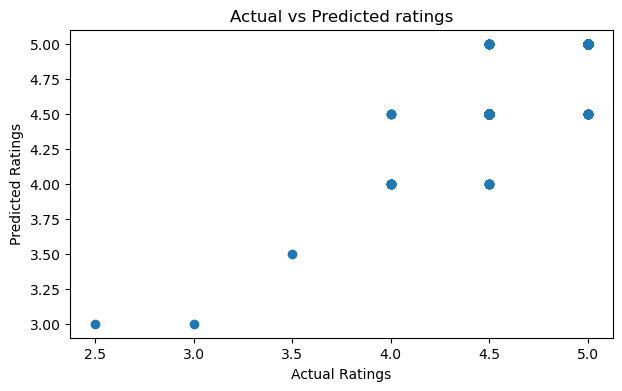

In [14]:
plt.figure(figsize=(7, 4))
plt.scatter(y_test, y_pred_dt)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted ratings')
plt.show()